In [3]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [50]:
b_a_x = pd.read_csv("body_acc_x_train.txt", sep = " ",on_bad_lines = "warn" ,skipinitialspace=True, header = None)
b_a_y = pd.read_csv("body_acc_y_train.txt", sep = " ",on_bad_lines = "warn" ,skipinitialspace=True, header = None)
b_a_z = pd.read_csv("body_acc_z_train.txt", sep = " ",on_bad_lines = "warn" ,skipinitialspace=True, header = None)
b_g_x = pd.read_csv("body_gyro_x_train.txt", sep = " ",on_bad_lines = "warn" ,skipinitialspace=True, header = None)
b_g_y = pd.read_csv("body_gyro_y_train.txt", sep = " ",on_bad_lines = "warn" ,skipinitialspace=True, header = None)
b_g_z = pd.read_csv("body_gyro_z_train.txt", sep = " ",on_bad_lines = "warn" ,skipinitialspace=True, header = None)
t_a_x = pd.read_csv("total_acc_x_train.txt", sep = " ",on_bad_lines = "warn" ,skipinitialspace=True, header = None)
t_a_y = pd.read_csv("total_acc_y_train.txt", sep = " ",on_bad_lines = "warn" ,skipinitialspace=True, header = None)
t_a_z = pd.read_csv("total_acc_z_train.txt", sep = " ",on_bad_lines = "warn" ,skipinitialspace=True, header = None)

In [51]:
b_a_x.loc[0,64:]

64     0.001094
65     0.004550
66     0.002879
67     0.002247
68     0.003305
         ...   
123    0.000228
124   -0.000300
125   -0.001147
126   -0.000222
127    0.001576
Name: 0, Length: 64, dtype: float64

In [52]:
b_a_x.loc[1,0:64]

0     0.001094
1     0.004550
2     0.002879
3     0.002247
4     0.003305
        ...   
60   -0.000300
61   -0.001147
62   -0.000222
63    0.001576
64    0.003531
Name: 1, Length: 65, dtype: float64

In [53]:
b_a_x

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.000181,0.010139,0.009276,0.005066,0.010810,0.004045,0.004757,0.006214,0.003307,0.007572,...,0.001412,-0.001509,0.000060,0.000435,-0.000819,0.000228,-0.000300,-0.001147,-0.000222,0.001576
1,0.001094,0.004550,0.002879,0.002247,0.003305,0.002416,0.001619,0.000981,0.000009,-0.000363,...,-0.000104,-0.000141,0.001333,0.001541,0.001077,-0.000736,-0.003767,-0.004646,-0.002941,-0.001599
2,0.003531,0.002285,-0.000420,-0.003738,-0.006706,-0.003148,0.000733,0.000668,0.002162,-0.000946,...,0.000661,0.001853,-0.000268,-0.000394,-0.000279,-0.000316,0.000144,0.001246,0.003117,0.002178
3,-0.001772,-0.001311,0.000388,0.000408,-0.000355,0.000998,0.001109,-0.003149,-0.008882,-0.010483,...,0.000458,0.002103,0.001358,0.000820,-0.000212,-0.001915,-0.001631,-0.000867,-0.001172,-0.000028
4,0.000087,-0.000272,0.001022,0.003126,0.002284,0.000885,0.001933,0.002270,0.002247,0.002175,...,0.002529,0.003518,-0.000248,-0.002761,0.000252,0.003752,0.001626,-0.000698,-0.001223,-0.003328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.388873,0.618763,0.774067,0.586568,0.217007,-0.027330,-0.171294,-0.218988,-0.137680,0.033094,...,-0.227949,-0.247119,-0.227710,-0.210942,-0.179295,-0.142085,-0.131831,-0.154000,-0.176886,-0.211068
7348,0.711864,0.709237,0.321368,-0.028921,-0.208107,-0.192802,-0.066754,-0.042285,0.058089,0.106855,...,-0.311864,-0.316281,-0.274100,-0.326159,-0.379539,-0.382544,-0.371156,-0.295357,-0.203831,-0.124548
7349,-0.226717,-0.177817,-0.150869,-0.132237,-0.068338,0.007874,0.096481,0.205834,0.441342,0.662930,...,-0.177051,-0.248426,-0.313892,-0.367070,-0.395135,-0.347338,-0.319902,-0.294935,-0.243403,-0.215215
7350,-0.064806,-0.079933,-0.068350,-0.038477,-0.028679,0.018335,0.077571,0.253580,0.507805,0.583999,...,-0.240819,-0.330930,-0.396854,-0.413906,-0.379085,-0.356609,-0.317618,-0.315016,-0.330737,-0.272348


In [54]:
X_tr = pd.read_csv("X_train.txt", sep = " ",on_bad_lines = "warn" ,skipinitialspace=True, header = None)
y_tr = pd.read_csv("y_train.txt", sep = " ",on_bad_lines = "warn" ,skipinitialspace=True, header = None)

In [55]:
X_ts = pd.read_csv("X_test.txt", sep = " ",on_bad_lines = "warn" ,skipinitialspace=True, header = None)
y_ts = pd.read_csv("y_test.txt", sep = " ",on_bad_lines = "warn" ,skipinitialspace=True, header = None)

In [56]:
X_tr = X_tr.to_numpy()
y_tr = y_tr.to_numpy()
X_ts = X_ts.to_numpy()
y_ts = y_ts.to_numpy()

In [57]:
X_ts

array([[ 0.25717778, -0.02328523, -0.01465376, ..., -0.72000927,
         0.27680104, -0.0579783 ],
       [ 0.28602671, -0.01316336, -0.11908252, ..., -0.69809082,
         0.28134292, -0.08389801],
       [ 0.27548482, -0.02605042, -0.11815167, ..., -0.70277146,
         0.28008303, -0.0793462 ],
       ...,
       [ 0.34996609,  0.03007744, -0.11578796, ..., -0.65535684,
         0.27447878,  0.18118355],
       [ 0.23759383,  0.01846687, -0.09649893, ..., -0.65971859,
         0.26478161,  0.18756291],
       [ 0.15362719, -0.01843651, -0.13701846, ..., -0.66008023,
         0.26393619,  0.1881034 ]])

In [58]:
des_tr = DecisionTreeClassifier(criterion = 'entropy', max_depth = 20)
des_tr.fit(X_tr,y_tr)

DecisionTreeClassifier(criterion='entropy', max_depth=20)

In [59]:
y_ts = y_ts.ravel()
y_ts

array([5, 5, 5, ..., 2, 2, 2], dtype=int64)

In [60]:
y_ts_pr = des_tr.predict(X_ts)
y_ts_pr

array([5, 5, 5, ..., 2, 1, 1], dtype=int64)

In [61]:
act = np.unique(y_ts)
act

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [62]:
def conf_mat(act,tr, fl):
    lbl = []
    for i in act:
        for j in act:
            lbl.append([i,j])
    c_m = pd.DataFrame(0, index = act, columns = act)
        
    for i in lbl:
    
        for k,j in zip(tr,fl):
                if i == [k,j]:
                    c_m.loc[k,j] += 1
    return c_m

c_m = conf_mat(act,y_ts,y_ts_pr)            

In [63]:
c_m

,1,2,3,4,5,6
1,459,15,22,0,0,0
2,77,327,67,0,0,0
3,26,48,346,0,0,0
4,0,1,0,378,112,0
5,0,0,0,78,454,0
6,0,0,0,0,0,537


In [64]:
r = []
for i in c_m.index:
    s_d = 0
    s = 0
    for j in c_m.columns:
        if i == j:
            s_d += c_m.loc[i,j]
        s += c_m.loc[i,j]
    r.append(s_d/s)
r

[0.9254032258064516,
 0.6942675159235668,
 0.8238095238095238,
 0.769857433808554,
 0.8533834586466166,
 1.0]

In [65]:
p = []
for j in c_m.columns:
    s_d = 0
    s = 0
    for i in c_m.index:
        if i == j:
            s_d += c_m.loc[i,j]
        s += c_m.loc[i,j]
    p.append(s_d/s)
np.mean(p)

0.8465854871353238

In [66]:
a = 0
t = 0
for i in c_m.index:
    for j in c_m.columns:
        if i == j:
            a += c_m.loc[i,j]
        t += c_m.loc[i,j]
print(a/t)

0.8486596538853071


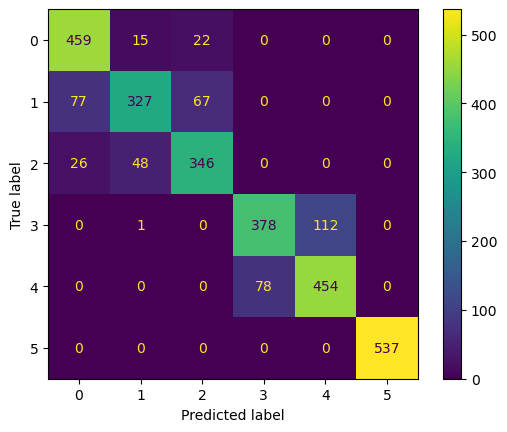

In [67]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay,classification_report
c = confusion_matrix(y_ts,y_ts_pr)
ConfusionMatrixDisplay(c).plot(cmap= 'viridis')

In [68]:
print(classification_report(y_ts,y_ts_pr))

              precision    recall  f1-score   support

           1       0.82      0.93      0.87       496
           2       0.84      0.69      0.76       471
           3       0.80      0.82      0.81       420
           4       0.83      0.77      0.80       491
           5       0.80      0.85      0.83       532
           6       1.00      1.00      1.00       537

    accuracy                           0.85      2947
   macro avg       0.85      0.84      0.84      2947
weighted avg       0.85      0.85      0.85      2947



In [69]:
abs(-1)

1

In [70]:
from typing import Union
import pandas as pd
import numpy as np

def conf_mat(act,tr, fl):
    lbl = []
    for i in act:
        for j in act:
            lbl.append([i,j])
    c_m = pd.DataFrame(0, index = act, columns = act)
        
    for i in lbl:
        for k,j in zip(tr,fl):
                if i == [k,j]:
                    c_m.loc[k,j] += 1
    return c_m


def accuracy(y_hat: pd.Series, y: pd.Series) -> float:
    """
    Function to calculate the accuracy
    """

    """
    The following assert checks if sizes of y_hat and y are equal.
    Students are required to add appropriate assert checks at places to
    ensure that the function does not fail in corner cases.
    """
    assert y_hat.size == y.size
    # TODO: Write here
    act = np.unique(y)
    c_m = conf_mat(act, y, y_hat)
    a = 0
    t = 0
    for i in c_m.index:
        for j in c_m.columns:
            if i == j:
                a += c_m.loc[i,j]
            t += c_m.loc[i,j]
    pass
    return (a/t)


def precision(y_hat: pd.Series, y: pd.Series, cls: Union[int, str]) -> float:
    """
    Function to calculate the precision
    """
    assert y_hat.size == y.size
    act = np.unique(y)
    c_m = conf_mat(act, y, y_hat)
    p = []
    for j in c_m.columns:
        s_d = 0
        s = 0
        for i in c_m.index:
            if i == j:
                s_d += c_m.loc[i,j]
            s += c_m.loc[i,j]
        p.append(s_d/s)
    p_ = np.mean(p)
    pass
    return p_


def recall(y_hat: pd.Series, y: pd.Series, cls: Union[int, str]) -> float:
    """
    Function to calculate the recall
    """
    assert y_hat.size == y.size
    act = np.unique(y)
    c_m = conf_mat(act, y, y_hat)
    r = []
    for i in c_m.index:
        s_d = 0
        s = 0
        for j in c_m.columns:
            if i == j:
                s_d += c_m.loc[i,j]
            s += c_m.loc[i,j]
        r.append(s_d/s)
    r_ = np.mean(r)
    pass
    return r_


def rmse(y_hat: pd.Series, y: pd.Series) -> float:
    """
    Function to calculate the root-mean-squared-error(rmse)
    """
    assert y_hat.size == y.size
    s = 0
    for i in range (len(y)):
        s += (y[i] - y_hat[i])**2
    s_m = (1/len(y))*s
    s_rm = np.sqrt(s_m)
    pass
    return s_rm


def mae(y_hat: pd.Series, y: pd.Series) -> float:
    """
    Function to calculate the mean-absolute-error(mae)
    """
    assert y_hat.size == y.size
    s = 0
    for i in range (len(y)):
        s += abs(y[i] - y_hat[i])
    s_m = (1/len(y))*s
    s_rm = np.sqrt(s_m)
    pass
    return s_rm

In [71]:
precision(y_ts_pr,y_ts, cls = 1)

0.8465854871353238

In [ ]:
Task 2 : Decision Trees for Human Activity Recognition
    Train a decision tree model using the features provided in the dataset. Report the accuracy, precision, recall and confusion matrix of the model.

In [72]:
X_tr = pd.read_csv("X_train.txt", sep = " ",on_bad_lines = "warn" ,skipinitialspace=True, header = None)
X_ts = pd.read_csv("X_test.txt", sep = " ",on_bad_lines = "warn" ,skipinitialspace=True, header = None)
y_tr = pd.read_csv("y_train.txt", sep = " ",on_bad_lines = "warn" ,skipinitialspace=True, header = None)
y_ts = pd.read_csv("y_test.txt", sep = " ",on_bad_lines = "warn" ,skipinitialspace=True, header = None)

In [106]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay,classification_report

def acc_check(X_tr, X_ts,y_tr,y_ts):
    accu = []
    dep = []
    for i in range (2,9):
        des_tr = DecisionTreeClassifier(criterion = 'entropy', max_depth = i)
        des_tr.fit(X_tr,y_tr)
        y_ts_pr = des_tr.predict(X_ts)
    #    c = confusion_matrix(y_ts,y_ts_pr)
    #    ConfusionMatrixDisplay(c).plot(cmap= 'viridis')
        accu.append(accuracy_score(y_ts,y_ts_pr))
        dep.append(i)
        print("Accuracy with depth", i, ":", accuracy_score(y_ts,y_ts_pr))
    return accu, dep

def plot_fig(dep,accu):
    plt.plot(dep,accu)
    plt.scatter(dep,accu)
    plt.xlabel("Depth of tree")
    plt.ylabel("Accuracy")
    plt.tight_layout()
    plt.ylim(0,1)

Accuracy with depth 2 0.6247030878859857
Accuracy with depth 3 0.8150661689854088
Accuracy with depth 4 0.839837122497455
Accuracy with depth 5 0.8547675602307431
Accuracy with depth 6 0.8432304038004751
Accuracy with depth 7 0.836443841194435
Accuracy with depth 8 0.846284356973193


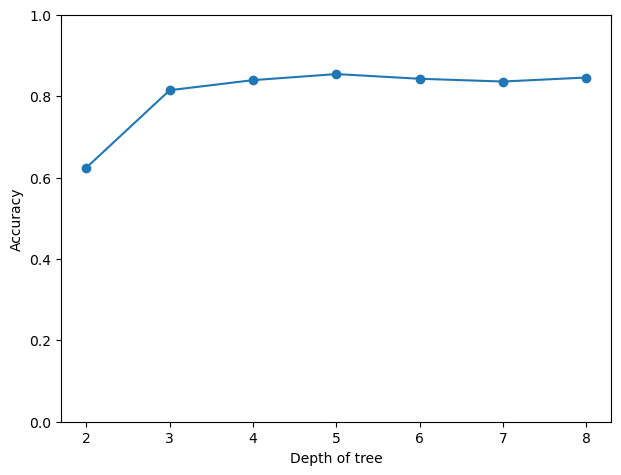

In [108]:
accu , dep = acc_check(X_tr, X_ts,y_tr,y_ts)
plot_fig(dep,accu)

TASK 3
On Manual Data

In [ ]:
x = pd.read_csv(r"C:\Users\RUPANJAN\Downloads\Walking_Assign1.csv", header = 1)
#a_1 = a_1.to_numpy()
x["TgF"][2500]
a_1 = []
for i in range (len(a_1)//2-250,len(a_1)//2+250):
    a_1.append(x["TgF"].iloc[i])
a_1


[0.835,
 0.84,
 0.852,
 0.852,
 0.861,
 0.865,
 0.869,
 0.88,
 0.916,
 0.899,
 0.89,
 0.9,
 0.909,
 0.936,
 0.96,
 0.977,
 0.997,
 1.023,
 1.048,
 1.096,
 1.14,
 1.157,
 1.187,
 1.214,
 1.225,
 1.243,
 1.248,
 1.257,
 1.26,
 1.263,
 1.265,
 1.266,
 1.274,
 1.283,
 1.291,
 1.293,
 1.294,
 1.293,
 1.292,
 1.282,
 1.274,
 1.256,
 1.244,
 1.214,
 1.186,
 1.173,
 1.143,
 1.119,
 1.099,
 1.093,
 1.087,
 1.083,
 1.079,
 1.069,
 1.067,
 1.07,
 1.075,
 1.084,
 1.095,
 1.1,
 1.12,
 1.133,
 1.136,
 1.137,
 1.137,
 1.182,
 1.212,
 1.23,
 1.25,
 1.287,
 1.317,
 1.359,
 1.397,
 1.412,
 1.445,
 1.457,
 1.465,
 1.461,
 1.437,
 1.385,
 1.356,
 1.286,
 1.247,
 1.167,
 1.091,
 1.052,
 1.015,
 0.951,
 0.899,
 0.865,
 0.857,
 0.811,
 0.74,
 0.743,
 0.754,
 0.782,
 0.815,
 0.875,
 0.903,
 0.909,
 0.909,
 0.908,
 0.907,
 0.895,
 0.875,
 0.873,
 0.871,
 0.873,
 0.898,
 0.918,
 0.928,
 0.954,
 1.072,
 1.115,
 1.148,
 1.165,
 1.174,
 1.183,
 1.193,
 1.18,
 1.171,
 1.144,
 1.136,
 1.133,
 1.111,
 1.114,
 1.125,


In [ ]:
x = pd.read_csv(r"C:\Users\RUPANJAN\Downloads\Walking_Assign1.csv", header = 1)
#a_1 = a_1.to_numpy()
x["TgF"][2500]
a_1 = []
for i in range (len(x["TgF"])//2-250,len(x["TgF"])//2+250):
    a_1.append(x["TgF"].iloc[i])
a_1.append(1)

[0.784,
 0.801,
 0.813,
 0.828,
 0.872,
 0.898,
 0.951,
 1.005,
 1.032,
 1.08,
 1.103,
 1.138,
 1.152,
 1.171,
 1.173,
 1.174,
 1.171,
 1.155,
 1.143,
 1.112,
 1.074,
 1.054,
 1.012,
 0.991,
 0.972,
 0.952,
 0.915,
 0.881,
 0.866,
 0.836,
 0.823,
 0.798,
 0.786,
 0.771,
 0.762,
 0.757,
 0.754,
 0.754,
 0.753,
 0.752,
 0.752,
 0.747,
 0.741,
 0.74,
 0.737,
 0.735,
 0.736,
 0.739,
 0.749,
 0.755,
 0.762,
 0.769,
 0.782,
 0.798,
 0.806,
 0.814,
 0.821,
 0.827,
 0.831,
 0.833,
 0.834,
 0.838,
 0.839,
 0.839,
 0.834,
 0.828,
 0.824,
 0.811,
 0.803,
 0.792,
 0.787,
 0.784,
 0.798,
 0.83,
 0.851,
 0.899,
 0.925,
 0.949,
 0.973,
 1.009,
 1.044,
 1.066,
 1.108,
 1.146,
 1.166,
 1.208,
 1.247,
 1.268,
 1.296,
 1.312,
 1.314,
 1.311,
 1.291,
 1.278,
 1.264,
 1.214,
 1.202,
 1.19,
 1.168,
 1.16,
 1.158,
 1.17,
 1.198,
 1.238,
 1.269,
 1.288,
 1.288,
 1.283,
 1.253,
 1.201,
 1.173,
 1.142,
 0.979,
 0.943,
 0.931,
 0.925,
 0.922,
 0.922,
 0.927,
 0.949,
 0.964,
 0.981,
 1.0,
 1.037,
 1.052,
 1.067,


In [22]:
x = pd.read_csv(r"C:\Users\RUPANJAN\Downloads\Walking_Upstairs_Assign1.csv", header = 1)
#a_1 = a_1.to_numpy()
x["TgF"][2500]
a_2 = []
for i in range (len(x["TgF"])//2-250,len(x["TgF"])//2+250):
    a_2.append(x["TgF"].iloc[i])
a_2

[0.961,
 0.965,
 0.968,
 0.971,
 0.972,
 0.978,
 0.979,
 0.984,
 0.994,
 1.006,
 1.021,
 1.027,
 1.046,
 1.063,
 1.081,
 1.095,
 1.102,
 1.116,
 1.129,
 1.133,
 1.141,
 1.145,
 1.147,
 1.145,
 1.141,
 1.136,
 1.132,
 1.129,
 1.117,
 1.106,
 1.096,
 1.094,
 1.092,
 1.095,
 1.103,
 1.116,
 1.123,
 1.127,
 1.129,
 1.129,
 1.132,
 1.134,
 1.134,
 1.133,
 1.135,
 1.138,
 1.14,
 1.141,
 1.14,
 1.134,
 1.121,
 1.113,
 1.1,
 1.083,
 1.062,
 1.052,
 1.03,
 1.008,
 0.997,
 0.974,
 0.964,
 0.941,
 0.931,
 0.906,
 0.885,
 0.868,
 0.861,
 0.858,
 0.853,
 0.852,
 0.853,
 0.855,
 0.859,
 0.871,
 0.886,
 0.894,
 0.915,
 0.933,
 0.95,
 0.966,
 0.972,
 0.986,
 1.0,
 1.007,
 1.019,
 1.028,
 1.031,
 1.031,
 1.026,
 1.023,
 1.016,
 1.011,
 1.008,
 1.002,
 0.996,
 0.993,
 0.99,
 0.981,
 0.977,
 0.976,
 0.974,
 0.976,
 0.978,
 0.983,
 0.984,
 0.984,
 0.981,
 0.98,
 0.981,
 0.98,
 0.982,
 0.984,
 0.987,
 0.992,
 0.994,
 1.002,
 1.004,
 1.008,
 1.014,
 1.015,
 1.018,
 1.021,
 1.022,
 1.024,
 1.025,
 1.027,
 1.

In [25]:
x = pd.read_csv(r"C:\Users\RUPANJAN\Downloads\Walking_Downstairs_Assign1.csv", header = 1)
#a_1 = a_1.to_numpy()
x["TgF"][2500]
a_3 = []
for i in range (len(x["TgF"])//2-250,len(x["TgF"])//2+250):
    a_3.append(x["TgF"].iloc[i])
a_3

[0.845,
 0.853,
 0.878,
 0.893,
 0.911,
 0.953,
 0.974,
 0.995,
 1.028,
 1.046,
 1.05,
 1.056,
 1.058,
 1.071,
 1.08,
 1.091,
 1.102,
 1.13,
 1.144,
 1.178,
 1.192,
 1.204,
 1.226,
 1.245,
 1.29,
 1.313,
 1.323,
 1.331,
 1.341,
 1.344,
 1.342,
 1.339,
 1.321,
 1.301,
 1.277,
 1.266,
 1.245,
 1.236,
 1.232,
 1.227,
 1.222,
 1.217,
 1.221,
 1.231,
 1.238,
 1.248,
 1.261,
 1.294,
 1.312,
 1.335,
 1.34,
 1.323,
 1.243,
 1.193,
 1.151,
 1.113,
 1.1,
 1.078,
 1.07,
 1.048,
 1.012,
 1.0,
 0.989,
 0.975,
 0.935,
 0.896,
 0.877,
 0.843,
 0.81,
 0.797,
 0.777,
 0.765,
 0.762,
 0.769,
 0.779,
 0.792,
 0.802,
 0.822,
 0.829,
 0.835,
 0.845,
 0.849,
 0.852,
 0.846,
 0.835,
 0.83,
 0.818,
 0.812,
 0.807,
 0.799,
 0.795,
 0.792,
 0.783,
 0.779,
 0.774,
 0.77,
 0.763,
 0.757,
 0.75,
 0.747,
 0.751,
 0.751,
 0.757,
 0.765,
 0.771,
 0.776,
 0.786,
 0.791,
 0.8,
 0.81,
 0.813,
 0.818,
 0.821,
 0.823,
 0.83,
 0.835,
 0.849,
 0.859,
 0.877,
 0.902,
 0.918,
 0.931,
 0.958,
 0.974,
 1.003,
 1.029,
 1.056,
 1

In [ ]:
x = pd.read_csv(r"C:\Users\RUPANJAN\Downloads\Sitting_Assign1.csv", header = 1)
#a_1 = a_1.to_numpy()
x["TgF"][2500]
a_4 = []
for i in range (len(x["TgF"])//2-250,len(x["TgF"])//2+250):
    a_4.append(x["TgF"].iloc[i])
a_4

[0.996,
 1.0,
 1.002,
 1.004,
 1.005,
 1.006,
 1.007,
 1.006,
 1.009,
 1.009,
 1.008,
 1.006,
 1.004,
 0.999,
 0.997,
 0.997,
 0.998,
 0.999,
 1.001,
 1.004,
 1.004,
 1.006,
 1.005,
 0.998,
 0.999,
 1.0,
 1.001,
 1.003,
 1.003,
 1.003,
 1.001,
 0.998,
 0.996,
 0.994,
 0.993,
 0.993,
 0.992,
 0.993,
 0.995,
 0.995,
 0.997,
 0.999,
 1.0,
 1.002,
 1.012,
 1.013,
 1.016,
 1.016,
 1.018,
 1.018,
 1.018,
 1.018,
 1.016,
 1.014,
 1.011,
 1.009,
 1.006,
 0.999,
 0.992,
 0.99,
 0.987,
 0.988,
 0.988,
 0.989,
 0.993,
 0.995,
 0.996,
 1.0,
 1.004,
 1.008,
 1.01,
 1.009,
 1.011,
 1.011,
 1.01,
 1.006,
 1.003,
 1.003,
 0.999,
 0.995,
 0.993,
 0.99,
 0.989,
 0.993,
 0.994,
 0.996,
 0.997,
 1.0,
 1.001,
 1.005,
 1.005,
 1.007,
 1.007,
 1.008,
 1.01,
 1.011,
 1.009,
 1.008,
 1.006,
 1.005,
 1.004,
 1.002,
 1.003,
 1.003,
 1.004,
 1.002,
 1.003,
 1.003,
 1.003,
 1.003,
 1.001,
 0.999,
 0.994,
 0.992,
 0.993,
 0.994,
 0.992,
 0.992,
 0.991,
 0.995,
 0.995,
 0.995,
 0.998,
 0.999,
 1.002,
 1.005,
 1.006,

In [27]:
x = pd.read_csv(r"C:\Users\RUPANJAN\Downloads\Standing_Assign1.csv", header = 1)
#a_1 = a_1.to_numpy()
x["TgF"][2500]
a_5 = []
for i in range (len(x["TgF"])//2-250,len(x["TgF"])//2+250):
    a_5.append(x["TgF"].iloc[i])
a_5

[1.063,
 1.067,
 1.061,
 1.056,
 1.036,
 1.029,
 1.014,
 1.007,
 0.99,
 0.976,
 0.968,
 0.961,
 0.949,
 0.943,
 0.937,
 0.937,
 0.935,
 0.939,
 0.948,
 0.961,
 0.969,
 0.987,
 1.006,
 1.022,
 1.037,
 1.045,
 1.057,
 1.072,
 1.076,
 1.077,
 1.073,
 1.068,
 1.06,
 1.052,
 1.038,
 1.029,
 1.012,
 1.003,
 0.994,
 0.987,
 0.973,
 0.961,
 0.958,
 0.954,
 0.953,
 0.951,
 0.952,
 0.954,
 0.954,
 0.957,
 0.969,
 0.978,
 0.983,
 0.988,
 1.008,
 1.015,
 1.019,
 1.027,
 1.032,
 1.035,
 1.037,
 1.038,
 1.034,
 1.032,
 1.025,
 1.018,
 1.015,
 1.008,
 1.004,
 0.993,
 0.986,
 0.981,
 0.977,
 0.972,
 0.969,
 0.966,
 0.968,
 0.983,
 0.988,
 0.999,
 1.006,
 1.016,
 1.02,
 1.027,
 1.034,
 1.039,
 1.041,
 1.043,
 1.041,
 1.04,
 1.036,
 1.027,
 1.02,
 1.013,
 1.01,
 1.006,
 0.988,
 0.977,
 0.972,
 0.964,
 0.961,
 0.97,
 0.972,
 0.975,
 0.98,
 0.99,
 0.996,
 1.005,
 1.01,
 1.017,
 1.024,
 1.027,
 1.027,
 1.03,
 1.032,
 1.032,
 1.031,
 1.032,
 1.032,
 1.027,
 1.024,
 1.02,
 1.02,
 1.009,
 1.006,
 1.003,
 1.0,

In [28]:
x = pd.read_csv(r"C:\Users\RUPANJAN\Downloads\Laying_Assign1.csv", header = 1)
#a_1 = a_1.to_numpy()
x["TgF"][2500]
a_6 = []
for i in range (len(x["TgF"])//2-250,len(x["TgF"])//2+250):
    a_6.append(x["TgF"].iloc[i])
a_6

[0.989,
 0.99,
 0.992,
 0.992,
 0.992,
 0.991,
 0.993,
 0.993,
 0.993,
 0.995,
 0.995,
 0.995,
 0.996,
 0.993,
 0.99,
 0.986,
 0.985,
 0.985,
 0.986,
 0.988,
 0.988,
 0.991,
 0.994,
 0.994,
 0.994,
 0.991,
 0.99,
 0.991,
 0.992,
 0.993,
 0.993,
 0.996,
 0.997,
 0.998,
 1.001,
 1.0,
 0.998,
 0.998,
 0.998,
 0.997,
 0.996,
 0.993,
 0.993,
 0.991,
 0.991,
 0.99,
 0.99,
 0.988,
 0.987,
 0.987,
 0.987,
 0.987,
 0.986,
 0.989,
 0.988,
 0.988,
 0.986,
 0.987,
 0.988,
 0.99,
 0.992,
 0.993,
 0.993,
 0.994,
 0.994,
 0.996,
 0.997,
 0.996,
 0.996,
 0.999,
 0.999,
 0.997,
 0.995,
 0.993,
 0.993,
 0.993,
 0.99,
 0.989,
 0.988,
 0.989,
 0.988,
 0.989,
 0.988,
 0.989,
 0.991,
 0.988,
 0.992,
 0.991,
 0.991,
 0.994,
 0.994,
 0.994,
 0.993,
 0.993,
 0.994,
 0.992,
 0.995,
 0.996,
 0.995,
 0.993,
 0.994,
 0.991,
 0.993,
 0.992,
 0.991,
 0.991,
 0.993,
 0.991,
 0.992,
 0.991,
 0.991,
 0.992,
 0.993,
 0.994,
 0.994,
 0.992,
 0.991,
 0.991,
 0.99,
 0.991,
 0.992,
 0.993,
 0.993,
 0.99,
 0.993,
 0.991,
 0.

In [33]:
df1 = pd.DataFrame([a_1,a_2,a_3,a_4,a_5,a_6])
df1 = df1**2
df1[500] = np.array([1,2,3,4,5,6],dtype = object)
df1 

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
0,0.614656,0.641601,0.660969,0.685584,0.760384,0.806404,0.904401,1.010025,1.065024,1.166400,...,1.142761,1.153476,1.168561,1.210000,1.225449,1.229881,1.225449,1.223236,1.212201,1
1,0.923521,0.931225,0.937024,0.942841,0.944784,0.956484,0.958441,0.968256,0.988036,1.012036,...,0.788544,0.793881,0.806404,0.829921,0.846400,0.857476,0.864900,0.872356,0.883600,2
2,0.714025,0.727609,0.770884,0.797449,0.829921,0.908209,0.948676,0.990025,1.056784,1.094116,...,0.670761,0.682276,0.708964,0.720801,0.753424,0.769129,0.788544,0.826281,0.842724,3
3,0.992016,1.000000,1.004004,1.008016,1.010025,1.012036,1.014049,1.012036,1.018081,1.018081,...,0.992016,0.996004,1.000000,1.000000,0.998001,0.998001,0.996004,0.992016,0.986049,4
4,1.129969,1.138489,1.125721,1.115136,1.073296,1.058841,1.028196,1.014049,0.980100,0.952576,...,0.996004,1.010025,1.016064,1.034289,1.040400,1.050625,1.050625,1.046529,1.032256,5
5,0.978121,0.980100,0.984064,0.984064,0.984064,0.982081,0.986049,0.986049,0.986049,0.990025,...,0.972196,0.972196,0.974169,0.972196,0.970225,0.970225,0.974169,0.976144,0.978121,6


In [41]:
b_1 = pd.read_csv("D:\IIT GANDHINAGAR\Semester 5\ES335 Machine Learning\Assignment 1\processed_csvs_final\person1_walking_proc_notime.csv", header = 0)
b_1["t"] = b_1["x"]**2 + b_1["y"]**2 + b_1["z"]**2
b_1 = b_1["z"]
b_1

b_2 = pd.read_csv("D:\IIT GANDHINAGAR\Semester 5\ES335 Machine Learning\Assignment 1\processed_csvs_final\person1_walking upstairs_proc_notime.csv", header = 0)
b_2["t"] = b_2["x"]**2 + b_2["y"]**2 + b_2["z"]**2
b_2 = b_2["z"]
b_2

b_3 = pd.read_csv("D:\IIT GANDHINAGAR\Semester 5\ES335 Machine Learning\Assignment 1\processed_csvs_final\person1_walking downstairs_proc_notime.csv", header = 0)
b_3["t"] = b_3["x"]**2 + b_3["y"]**2 + b_3["z"]**2
b_3 = b_3["z"]
b_3

b_4 = pd.read_csv("D:\IIT GANDHINAGAR\Semester 5\ES335 Machine Learning\Assignment 1\processed_csvs_final\person1_sitting_proc_notime.csv", header = 0)
b_4["t"] = b_4["x"]**2 + b_4["y"]**2 + b_4["z"]**2
b_4 = b_4["z"]
b_4

b_5 = pd.read_csv("D:\IIT GANDHINAGAR\Semester 5\ES335 Machine Learning\Assignment 1\processed_csvs_final\person1_standing_proc_notime.csv", header = 0)
b_5["t"] = b_5["x"]**2 + b_5["y"]**2 + b_5["z"]**2
b_5 = b_5["z"]
b_5

b_6 = pd.read_csv("D:\IIT GANDHINAGAR\Semester 5\ES335 Machine Learning\Assignment 1\processed_csvs_final\person1_laying_proc_notime.csv", header = 0)
b_6["t"] = b_6["x"]**2 + b_6["y"]**2 + b_6["z"]**2
b_6 = b_6["z"]
b_6

df2 = pd.DataFrame([b_1,b_2,b_3,b_4,b_5,b_6])
df2[500] = np.array([1,2,3,4,5,6],dtype = object)
df2 

<>:1: SyntaxWarning: invalid escape sequence '\I'
<>:6: SyntaxWarning: invalid escape sequence '\I'
<>:11: SyntaxWarning: invalid escape sequence '\I'
<>:16: SyntaxWarning: invalid escape sequence '\I'
<>:21: SyntaxWarning: invalid escape sequence '\I'
<>:26: SyntaxWarning: invalid escape sequence '\I'
<>:1: SyntaxWarning: invalid escape sequence '\I'
<>:6: SyntaxWarning: invalid escape sequence '\I'
<>:11: SyntaxWarning: invalid escape sequence '\I'
<>:16: SyntaxWarning: invalid escape sequence '\I'
<>:21: SyntaxWarning: invalid escape sequence '\I'
<>:26: SyntaxWarning: invalid escape sequence '\I'
C:\Users\RUPANJAN\AppData\Local\Temp\ipykernel_15848\4232002074.py:1: SyntaxWarning: invalid escape sequence '\I'
  b_1 = pd.read_csv("D:\IIT GANDHINAGAR\Semester 5\ES335 Machine Learning\Assignment 1\processed_csvs_final\person1_walking_proc_notime.csv", header = 0)
C:\Users\RUPANJAN\AppData\Local\Temp\ipykernel_15848\4232002074.py:6: SyntaxWarning: invalid escape sequence '\I'
  b_2 = pd

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
z,1.05,1.235,0.995000,0.659000,1.368,1.781,1.184,-0.075,-0.753,-0.490,...,-5.700000e-01,-0.220,0.304,0.400,0.285556,-0.032222,-0.511111,-0.886,-0.988000,1
z,-1.11,-1.090,-1.070000,-0.875000,-0.485,-0.076,0.218,0.545,0.779,0.693,...,2.758000e+00,2.924,2.076,0.724,-0.250000,-0.612000,-0.196000,0.300,0.298000,2
z,-0.70,-0.890,-0.964000,-0.797000,-0.507,-0.179,0.273,-0.072,0.394,2.195,...,-1.898000e+00,-1.816,-1.752,-1.362,-0.566000,0.148000,0.502000,1.104,2.377778,3
z,-0.14,-0.033,0.048000,-0.041000,-0.088,-0.248,-0.331,-0.140,-0.025,-0.120,...,7.600000e-02,-0.016,-0.110,-0.168,-0.184000,-0.128000,-0.022000,0.010,0.001111,4
z,0.19,0.128,0.134000,0.119000,0.065,-0.065,-0.172,-0.477,-0.991,-1.236,...,1.380000e-01,0.126,0.118,0.118,0.072000,0.010000,0.030000,0.084,-0.007000,5
z,1.03,1.110,1.337273,2.045455,2.424,2.666,2.251,1.752,1.565,1.660,...,7.105011e-15,0.112,0.118,0.006,-0.024000,0.036000,0.062000,0.096,0.093333,6


In [43]:
c_1 = pd.read_csv("D:\IIT GANDHINAGAR\Semester 5\ES335 Machine Learning\Assignment 1\processed_csvs_final\person2_walking_proc_notime.csv", header = 0)
c_1["t"] = c_1["x"]**2 + c_1["y"]**2 + c_1["z"]**2
c_1 = c_1["z"]
c_1

c_2 = pd.read_csv("D:\IIT GANDHINAGAR\Semester 5\ES335 Machine Learning\Assignment 1\processed_csvs_final\person2_walking upstairs_proc_notime.csv", header = 0)
c_2["t"] = c_2["x"]**2 + c_2["y"]**2 + c_2["z"]**2
c_2 = c_2["z"]
c_2

c_3 = pd.read_csv("D:\IIT GANDHINAGAR\Semester 5\ES335 Machine Learning\Assignment 1\processed_csvs_final\person2_walking downstairs_proc_notime.csv", header = 0)
c_3 = c_3["x"]**2 + c_3["y"]**2 + c_3["z"]**2
c_3

c_4 = pd.read_csv("D:\IIT GANDHINAGAR\Semester 5\ES335 Machine Learning\Assignment 1\processed_csvs_final\person2_sitting_proc_notime.csv", header = 0)
c_4["t"] = c_4["x"]**2 + c_4["y"]**2 + c_4["z"]**2
c_4 = c_4["z"]
c_4

c_5 = pd.read_csv("D:\IIT GANDHINAGAR\Semester 5\ES335 Machine Learning\Assignment 1\processed_csvs_final\person2_standing_proc_notime.csv", header = 0)
c_5["t"] = c_5["x"]**2 + c_5["y"]**2 + c_5["z"]**2
c_5 = c_5["z"]
c_5

c_6 = pd.read_csv("D:\IIT GANDHINAGAR\Semester 5\ES335 Machine Learning\Assignment 1\processed_csvs_final\person2_laying_proc_notime.csv", header = 0)
c_6["t"] = c_6["x"]**2 + c_6["y"]**2 + c_6["z"]**2
c_6 = c_6["z"]
c_6

df3 = pd.DataFrame([c_1,c_2,c_3,c_4,c_5,c_6])
df3[500] = np.array([1,2,3,4,5,6],dtype = object)
df3 

<>:1: SyntaxWarning: invalid escape sequence '\I'
<>:6: SyntaxWarning: invalid escape sequence '\I'
<>:11: SyntaxWarning: invalid escape sequence '\I'
<>:15: SyntaxWarning: invalid escape sequence '\I'
<>:20: SyntaxWarning: invalid escape sequence '\I'
<>:25: SyntaxWarning: invalid escape sequence '\I'
<>:1: SyntaxWarning: invalid escape sequence '\I'
<>:6: SyntaxWarning: invalid escape sequence '\I'
<>:11: SyntaxWarning: invalid escape sequence '\I'
<>:15: SyntaxWarning: invalid escape sequence '\I'
<>:20: SyntaxWarning: invalid escape sequence '\I'
<>:25: SyntaxWarning: invalid escape sequence '\I'
C:\Users\RUPANJAN\AppData\Local\Temp\ipykernel_15848\883798063.py:1: SyntaxWarning: invalid escape sequence '\I'
  c_1 = pd.read_csv("D:\IIT GANDHINAGAR\Semester 5\ES335 Machine Learning\Assignment 1\processed_csvs_final\person2_walking_proc_notime.csv", header = 0)
C:\Users\RUPANJAN\AppData\Local\Temp\ipykernel_15848\883798063.py:6: SyntaxWarning: invalid escape sequence '\I'
  c_2 = pd.r

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
z,0.0000,0.0900,1.000000e-01,0.0660,-0.015000,-0.081000,-0.067000,-0.015000,0.048000,-0.04800,...,-0.202000,0.07000,0.122000,0.086000,-0.074000,-0.322000,-0.511111,-0.570000,-0.532000,1
z,-1.7900,-1.8300,-1.950000e+00,-1.9100,-1.650000,-1.410000,-1.290000,-1.098000,-0.820000,-0.43000,...,-0.266000,-0.05800,-0.008000,-0.150000,-0.328000,-0.504000,-0.608000,-0.758000,-0.838000,2
Unnamed 0,4.0481,4.4057,4.444800e+00,4.2921,4.452795,5.330634,3.104577,2.484099,2.786625,4.01243,...,15.330404,19.28028,28.373076,16.458228,8.091928,3.946752,3.771236,3.679112,2.435541,3
z,0.0900,0.0200,3.000000e-02,0.0500,0.150000,0.220000,0.280000,0.247273,0.210000,0.18800,...,-0.080000,-0.07900,-0.005556,0.072000,0.076667,0.024000,0.026000,0.050000,0.066000,4
z,0.0700,-0.0200,-5.000000e-02,-0.0250,0.042000,0.082000,0.069000,0.018000,-0.016000,0.00700,...,-0.066000,-0.05400,0.010000,0.086000,0.132000,0.128000,0.100000,0.089000,0.127000,5
z,0.0300,0.0100,-3.490264e-17,0.0800,0.138000,0.041000,-0.136000,-0.190000,-0.064000,0.07300,...,-0.020000,-0.15200,0.004000,-0.088000,-0.272000,-0.006000,0.304000,0.411000,0.238000,6


In [45]:
df = pd.concat([df1,df2,df3],axis = 0,ignore_index = True)
df

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
0,0.614656,0.641601,6.609690e-01,0.685584,0.760384,0.806404,0.904401,1.010025,1.065024,1.166400,...,1.142761e+00,1.153476,1.168561,1.210000,1.225449,1.229881,1.225449,1.223236,1.212201,1
1,0.923521,0.931225,9.370240e-01,0.942841,0.944784,0.956484,0.958441,0.968256,0.988036,1.012036,...,7.885440e-01,0.793881,0.806404,0.829921,0.846400,0.857476,0.864900,0.872356,0.883600,2
2,0.714025,0.727609,7.708840e-01,0.797449,0.829921,0.908209,0.948676,0.990025,1.056784,1.094116,...,6.707610e-01,0.682276,0.708964,0.720801,0.753424,0.769129,0.788544,0.826281,0.842724,3
3,0.992016,1.000000,1.004004e+00,1.008016,1.010025,1.012036,1.014049,1.012036,1.018081,1.018081,...,9.920160e-01,0.996004,1.000000,1.000000,0.998001,0.998001,0.996004,0.992016,0.986049,4
4,1.129969,1.138489,1.125721e+00,1.115136,1.073296,1.058841,1.028196,1.014049,0.980100,0.952576,...,9.960040e-01,1.010025,1.016064,1.034289,1.040400,1.050625,1.050625,1.046529,1.032256,5
5,0.978121,0.980100,9.840640e-01,0.984064,0.984064,0.982081,0.986049,0.986049,0.986049,0.990025,...,9.721960e-01,0.972196,0.974169,0.972196,0.970225,0.970225,0.974169,0.976144,0.978121,6
6,1.050000,1.235000,9.950000e-01,0.659000,1.368000,1.781000,1.184000,-0.075000,-0.753000,-0.490000,...,-5.700000e-01,-0.220000,0.304000,0.400000,0.285556,-0.032222,-0.511111,-0.886000,-0.988000,1
7,-1.110000,-1.090000,-1.070000e+00,-0.875000,-0.485000,-0.076000,0.218000,0.545000,0.779000,0.693000,...,2.758000e+00,2.924000,2.076000,0.724000,-0.250000,-0.612000,-0.196000,0.300000,0.298000,2
8,-0.700000,-0.890000,-9.640000e-01,-0.797000,-0.507000,-0.179000,0.273000,-0.072000,0.394000,2.195000,...,-1.898000e+00,-1.816000,-1.752000,-1.362000,-0.566000,0.148000,0.502000,1.104000,2.377778,3
9,-0.140000,-0.033000,4.800000e-02,-0.041000,-0.088000,-0.248000,-0.331000,-0.140000,-0.025000,-0.120000,...,7.600000e-02,-0.016000,-0.110000,-0.168000,-0.184000,-0.128000,-0.022000,0.010000,0.001111,4
